<a href="https://colab.research.google.com/github/sakshamjn/Cat-vs-Dog/blob/master/For%20number%20plate%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/content/final"))


Using TensorFlow backend.


['valid16.jpeg', 'valid5.jpeg', 'valid24.jpeg', 'valid7.jpeg', 'invalid2.jpeg', 'invalid24.jpeg', 'valid1.jpeg', 'valid10.jpeg', 'invalid5.jpeg', 'invalid25.jpeg', 'valid4.jpeg', 'valid17.jpeg', 'valid3.jpeg', 'valid15.jpeg', 'valid23.jpeg', 'valid8.jpeg', 'valid19.jpeg', 'invalid10.jpeg', 'valid14.jpeg', 'valid11.jpeg', 'invalid12.jpeg', 'invalid14.jpeg', 'invalid8.jpeg', 'valid13.jpeg', 'invalid16.jpeg', 'invalid4.jpeg', 'invalid22.jpeg', 'invalid21.jpeg', 'invalid11.jpeg', 'valid2.jpeg', 'invalid19.jpeg', 'invalid23.jpeg', 'valid22.jpeg', 'invalid18.jpeg', 'valid20.jpeg', 'invalid1.jpeg', 'invalid20.jpeg', 'invalid9.jpeg', 'invalid3.jpeg', 'valid6.jpeg', 'valid12.jpeg', 'invalid13.jpeg', 'valid21.jpeg', 'valid9.jpeg', 'invalid6.jpeg', 'invalid7.jpeg', 'valid18.jpeg', 'invalid17.jpeg', 'valid25.jpeg', 'invalid15.jpeg']


# Define Constants

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [0]:
filenames = os.listdir("/content/final")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'valid':
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
filenames = os.listdir("/content/final")
categories = []
i=0
for filename in filenames:
    category = filename.split('.')[0]
    if category[0]=='v':
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [19]:
df.head()

,filename,category
0,valid16.jpeg,0
1,valid5.jpeg,0
2,valid24.jpeg,0
3,valid7.jpeg,0
4,invalid2.jpeg,1


In [20]:
df.tail()

,filename,category
45,invalid7.jpeg,1
46,valid18.jpeg,0
47,invalid17.jpeg,1
48,valid25.jpeg,0
49,invalid15.jpeg,1


### See Total In count

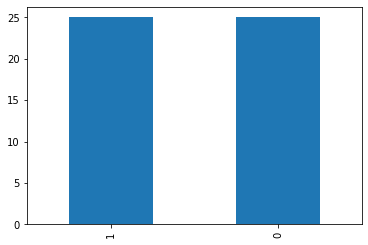

In [21]:
df['category'].value_counts().plot.bar()

# See sample image

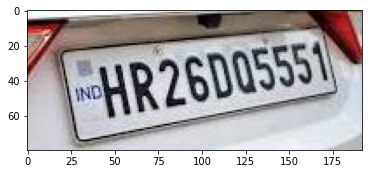

In [24]:
filenames = os.listdir("/content/valid")
sample = random.choice(filenames)
image = load_img("/content/valid/"+sample)
plt.imshow(image)

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

# Callbacks

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [0]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 



In [0]:
df["category"] = df["category"].replace({0: 'valid', 1: 'invalid'}) 

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

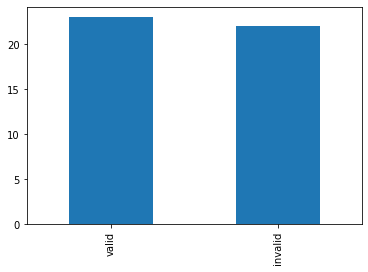

In [35]:
train_df['category'].value_counts().plot.bar()

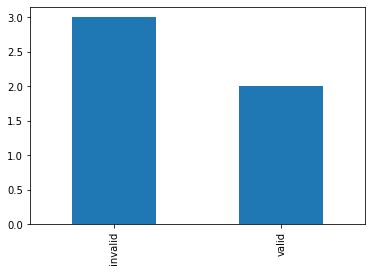

In [36]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [39]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/final", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 45 validated image filenames belonging to 2 classes.


In [40]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/final", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5 validated image filenames belonging to 2 classes.


In [41]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/final", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


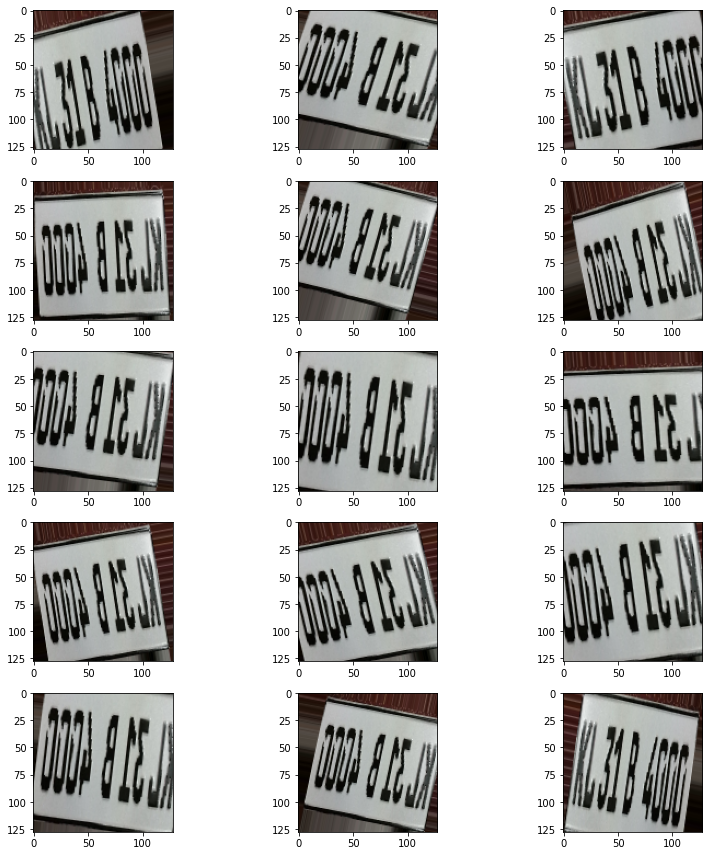

In [42]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [55]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
3/3 [==============================] - 3s 881ms/step - loss: 0.3963 - accuracy: 0.8444 - val_loss: 3.7606 - val_accuracy: 0.6000
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3/3 [==============================] - 2s 813ms/step - loss: 0.6340 - accuracy: 0.7333 - val_loss: 2.3267 - val_accuracy: 0.6000
Epoch 3/50
3/3 [==============================] - 2s 816ms/step - loss: 0.6470 - accuracy: 0.7778 - val_loss: 1.8237 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - 2s 816ms/step - loss: 0.2910 - accuracy: 0.8889 - val_loss: 2.0894 - val_accuracy: 0.6000
Epoch 5/50
3/3 [==============================] - 2s 811ms/step - loss: 0.2997 - accuracy: 0.8889 - val_loss: 2.8148 - val_accuracy: 0.6000
Epoch 6/50
3/3 [==============================] - 2s 808ms/step - loss: 0.4331 - accuracy: 0.8444 - val_loss: 1.3862 - val_accuracy: 0.6000
Epoch 7/50
3/3 [==============================] - 2s 808ms/step - loss: 0.4315 - accuracy: 0.8667 - val_loss: 1.9957 - val_accuracy: 0.6000
Epoch 8/50
3/3 [==============================] - 2s 812ms/step - loss: 0.2646 - accuracy: 0.8667 - val_loss: 2.1396 - val_accuracy: 0.6000
Epoch 9/50
3/3 [===============

In [0]:
model.save_weights("model.h5")

In [0]:
test_filenames = os.listdir("/content/final")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [47]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/final", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 50 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [0]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [0]:
test_df['category'] = test_df['category'].replace({ 'invalid': 1, 'valid': 0 })

### Virtaulize Result

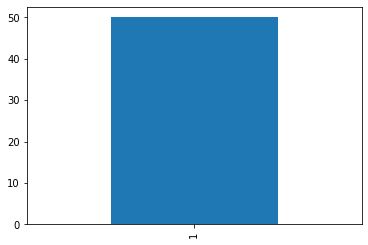

In [52]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

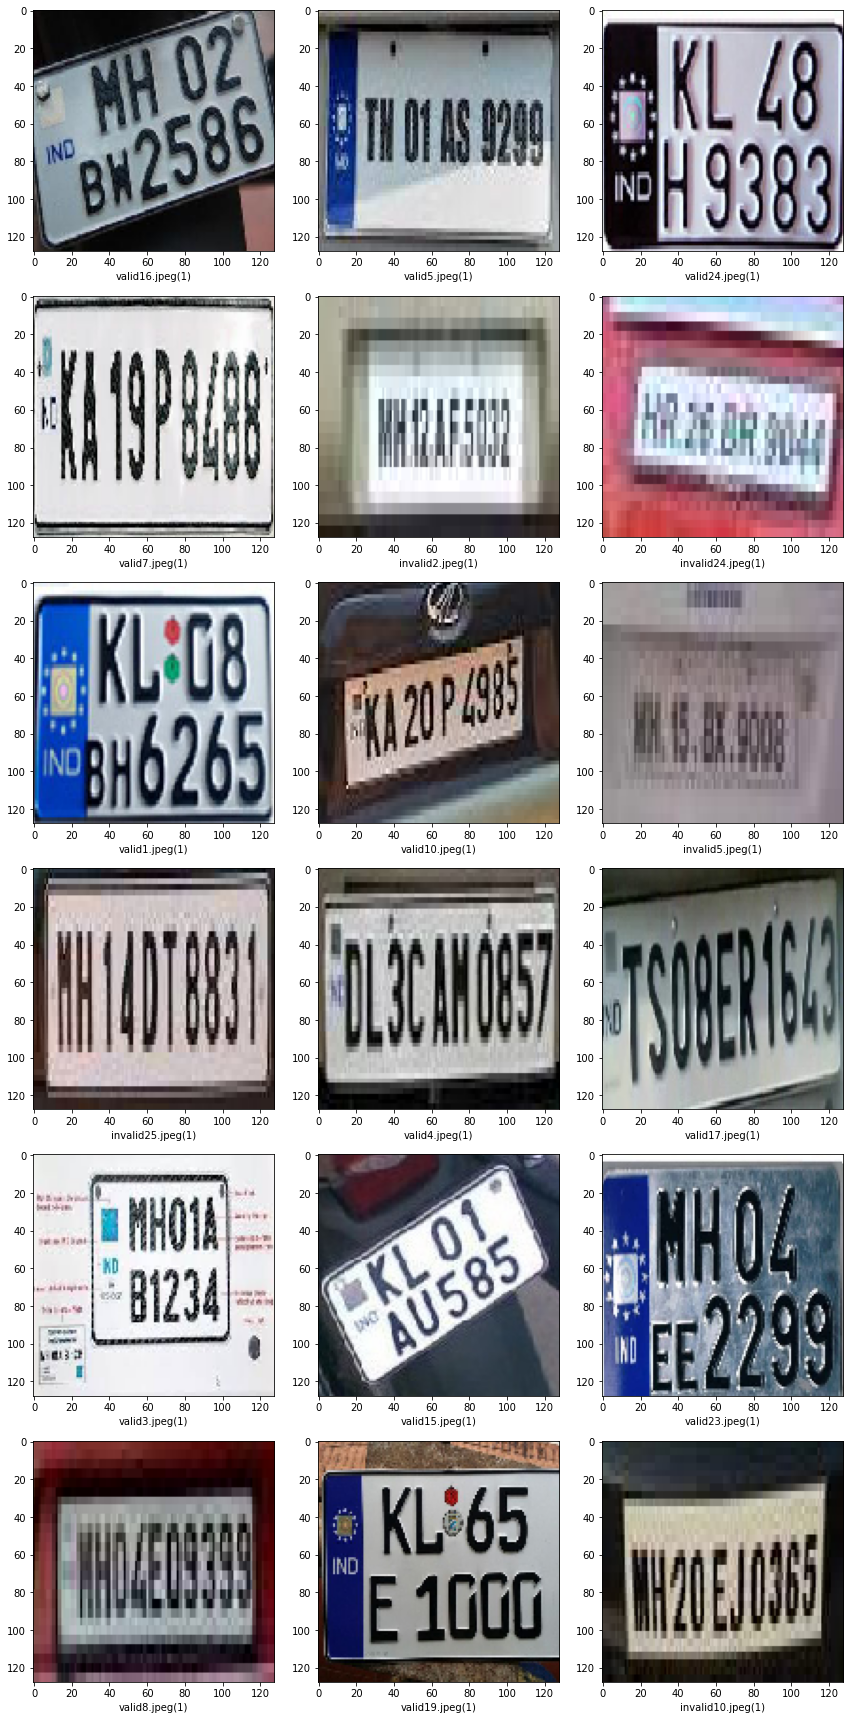

In [54]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/final/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()